In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_1 = cv.imread('COCA-COLA-LOGO.jpg')
img_2 = cv.imread('coca_logo_1.png')
img_3 = cv.imread('coca_logo_2.png')
img_4 = cv.imread('coca_multi.png')
img_5 = cv.imread('coca_retro_1.png')
img_6 = cv.imread('coca_retro_2.png')
img_7 = cv.imread('logo_1.png')

In [3]:
img_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
img_2_gray = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
img_3_gray = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY)
img_4_gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_5_gray = cv.cvtColor(img_5, cv.COLOR_BGR2GRAY)
img_6_gray = cv.cvtColor(img_6, cv.COLOR_BGR2GRAY)
img_7_gray = cv.cvtColor(img_7, cv.COLOR_BGR2GRAY)

In [4]:
template = cv.imread('pattern.png',0)

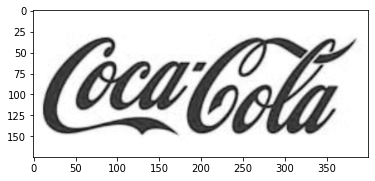

In [5]:
plt.imshow(template, cmap = "gray")

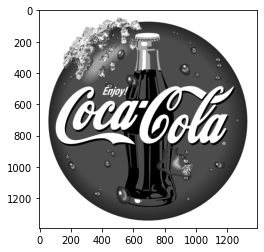

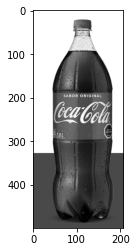

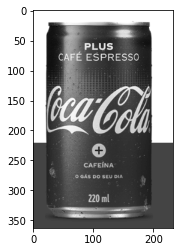

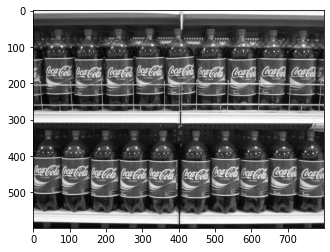

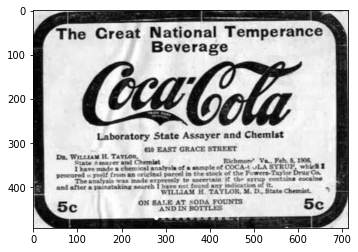

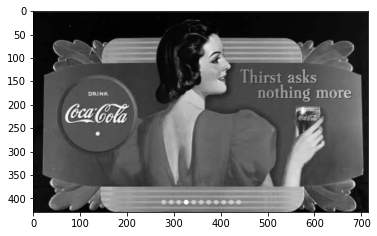

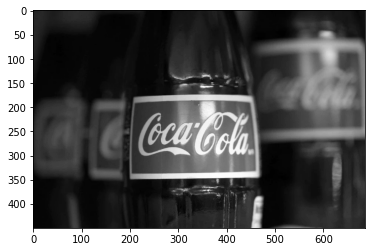

In [7]:
for i in range (1, 8):
  plt.figure()
  plt.imshow(eval('img_' + str(i) + '_gray'), cmap = "gray")
  plt.show()

comienzo aplicando el detector de bordes de Canny


In [9]:
from google.colab.patches import cv2_imshow

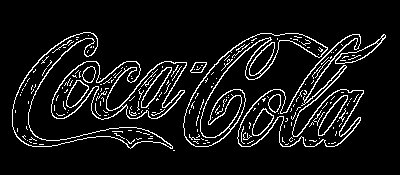

In [13]:
edges = cv.Canny(template,25, 50,L2gradient=True)
cv2_imshow(edges)

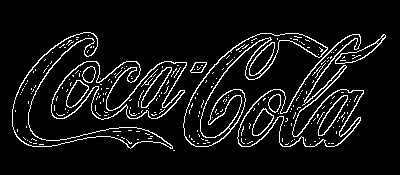

In [15]:
edges = cv.Canny(template,45, 50,L2gradient=True)
cv2_imshow(edges)

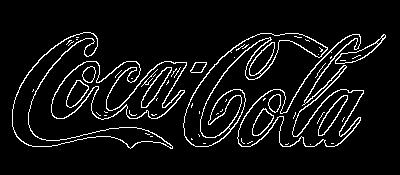

In [16]:
edges = cv.Canny(template,45, 80,L2gradient=True)
cv2_imshow(edges)

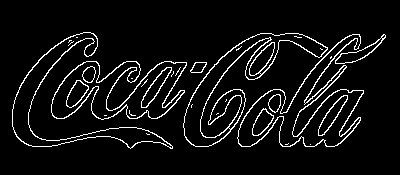

In [18]:
edges = cv.Canny(template,55, 90,L2gradient=True)
cv2_imshow(edges)

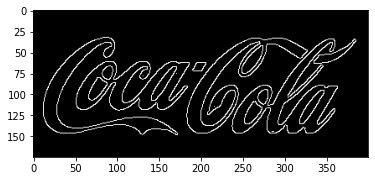

In [209]:
temp_edges = cv.Canny(template,90 ,100,L2gradient=True)
plt.imshow(temp_edges, cmap='gray')

In [41]:
temp_edges.shape[::-1]

(400, 175)

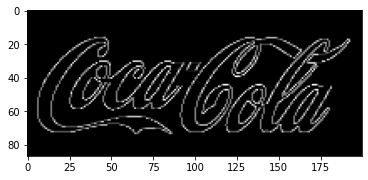

In [138]:
w, h = temp_edges.shape[::-1]
factor = 0.5
temp_resize = cv.resize(temp_edges, (int(factor*w),int(factor*h)))
plt.imshow(temp_resize, cmap='gray')

In [36]:
w, h = img_1_gray.shape[::-1]

(1389, 1389)

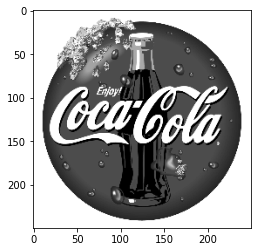

In [139]:
w, h = img_1_gray.shape[::-1]
factor = 0.18
img_1_resize = cv.resize(img_1_gray, (int(factor*w),int(factor*h)))
plt.imshow(img_1_resize, cmap='gray')

In [140]:
def find_template(img, template):
  w, h = template.shape[::-1]

  img_salida = img.copy()
  
  # Aplicamos la coincidencia de patrones
  #--------------------------------------
  res = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
  
  # Encontramos los valores máximos y mínimos
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

  top_left = max_loc

  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
  
  # Graficamos el procesamiento y la salida
  #----------------------------------------
  plt.figure(figsize=(10,10))
  
  # Imagen original con recuadros
  plt.imshow(img_salida,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])


  plt.suptitle('cv.TM_CCOEFF_NORMED')
  plt.show()
  print('nivel de confianza: '+ str(max_val))

In [302]:
def reshape (img, factor):
  w, h = img.shape[::-1]
  img_resize = cv.resize(img, (int(factor*w),int(factor*h)))
  plt.imshow(img_resize, cmap='gray')
  return img_resize

imagen 1:

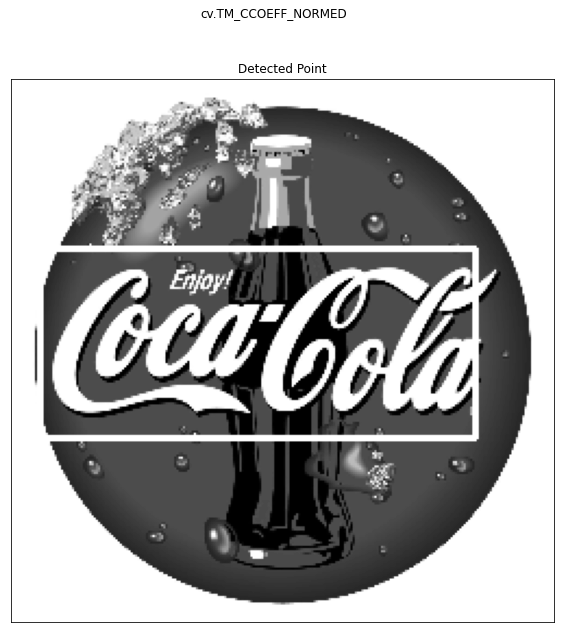

nivel de confianza: 0.14807863533496857


In [141]:
find_template(img_1_resize, temp_resize)

In [154]:
def reshape (img, factor):
  w, h = img.shape[::-1]
  img_resize = cv.resize(img, (int(factor*w),int(factor*h)))
  plt.imshow(img_resize, cmap='gray')
  return img_resize

imagen 2:

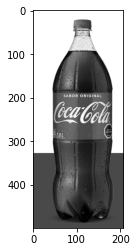

In [155]:
plt.imshow(img_2_gray, cmap='gray')

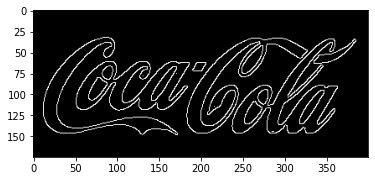

In [157]:
plt.imshow(temp_edges, cmap='gray')

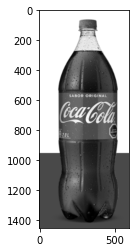

In [174]:
img_2_reshape = reshape(img_2_gray, 2.9)

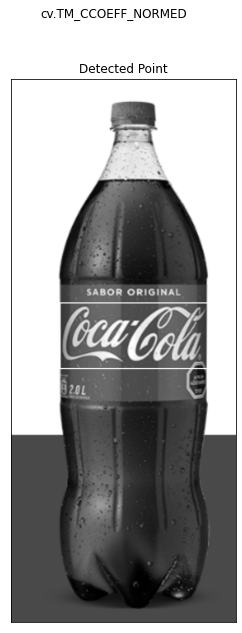

nivel de confianza: 0.09177962690591812


In [175]:
find_template(img_2_reshape, temp_edges)

imagen 3:

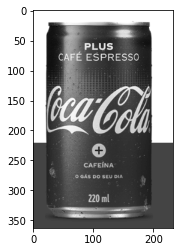

In [214]:
plt.imshow(img_3_gray, cmap='gray')

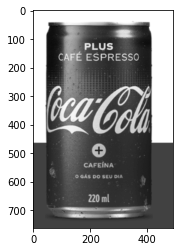

In [228]:
img_3_reshape = reshape(img_3_gray, 2.1)

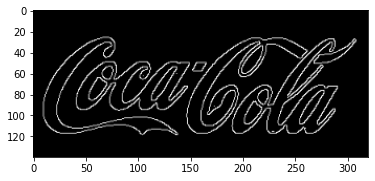

In [297]:
temp_resize = reshape(temp_edges, 0.8)

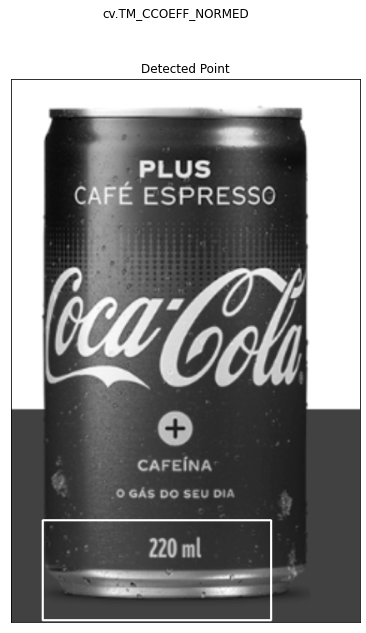

nivel de confianza: 0.13705667853355408


In [241]:
find_template(img_3_reshape, temp_resize)

In [295]:
negativo_3 = 255- img_3_gray

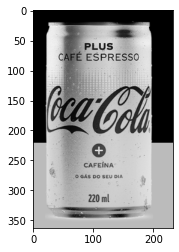

In [296]:
nega_3_reshape = reshape(negativo_3, 1)

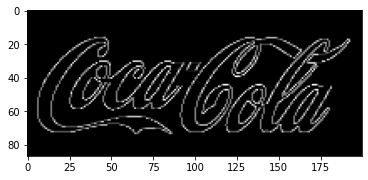

In [300]:
temp_resize = reshape(temp_edges, 0.5)

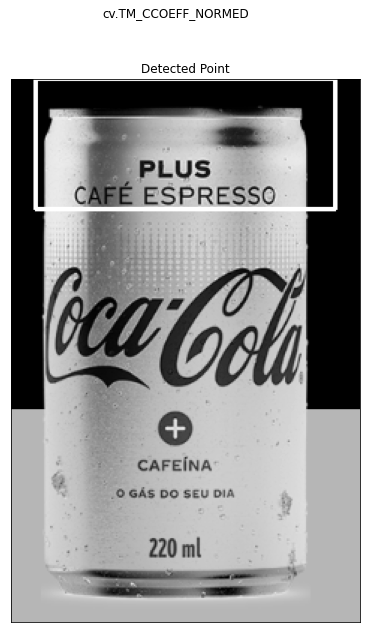

nivel de confianza: 0.17003537714481354


In [301]:
find_template(nega_3_reshape, temp_resize)

imagen 4:

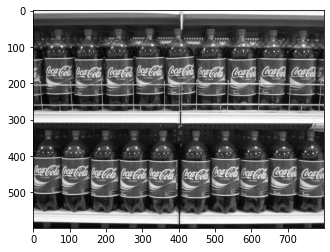

In [205]:
plt.imshow(img_4_gray, cmap='gray')

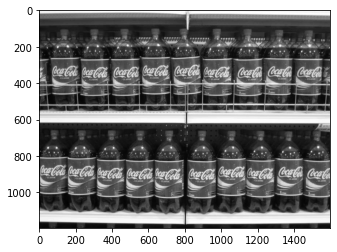

In [232]:
img_4_reshape = reshape(img_4_gray, 2)

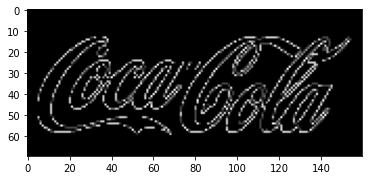

In [231]:
temp_resize = reshape(temp_edges, 0.4)

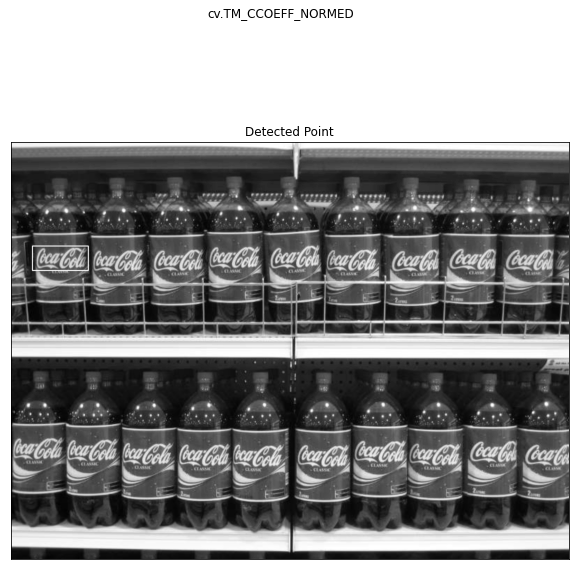

nivel de confianza: 0.22434529662132263


In [234]:
find_template(img_4_reshape, temp_resize )

imagen 5:

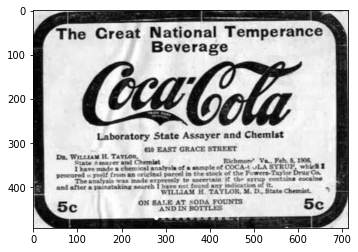

In [242]:
plt.imshow(img_5_gray, cmap='gray')

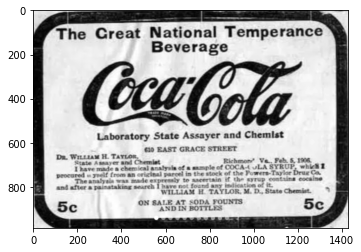

In [266]:
img_5_reshape = reshape(img_5_gray, 2)

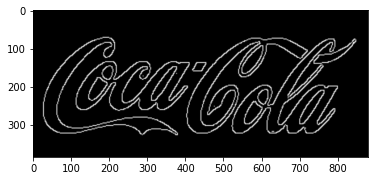

In [284]:
temp_resize = reshape(temp_edges, 2.2)

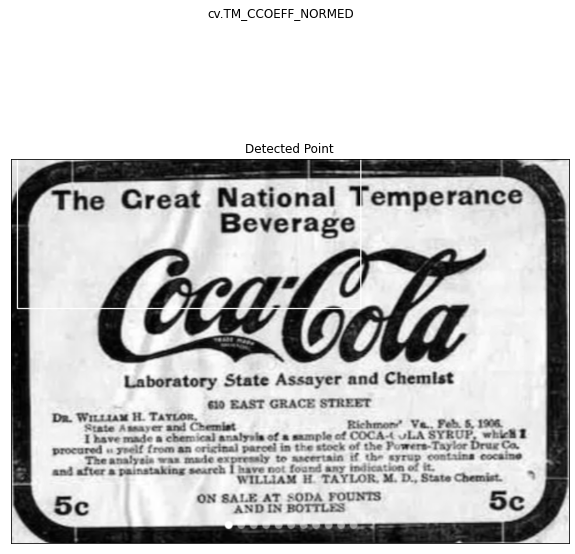

nivel de confianza: 0.13240133225917816


In [285]:
find_template(img_5_reshape, temp_resize )

In [286]:
negativo_5 = 255 - img_5_gray

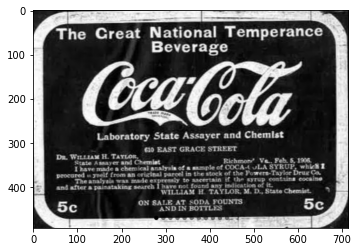

In [287]:
plt.imshow(negativo_5, cmap='gray')

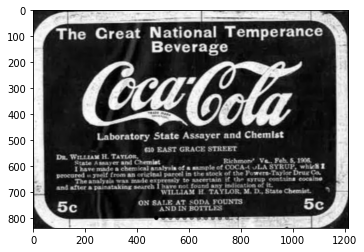

In [293]:
negativo_5_reshape = reshape(negativo_5, 1.7)

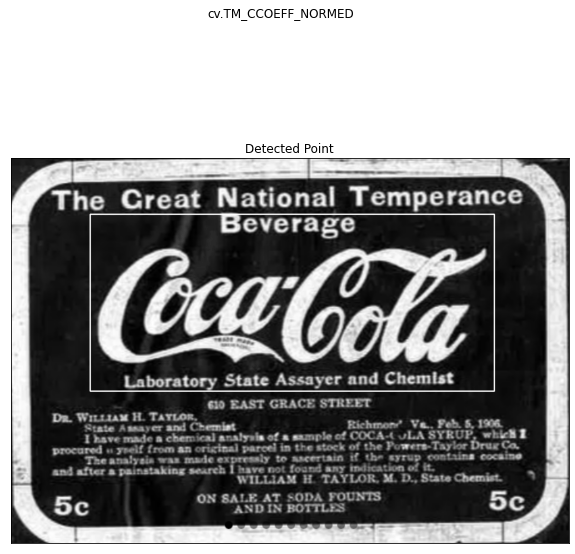

nivel de confianza: 0.21753856539726257


In [294]:
find_template(negativo_5_reshape, temp_resize )

imagen 6:


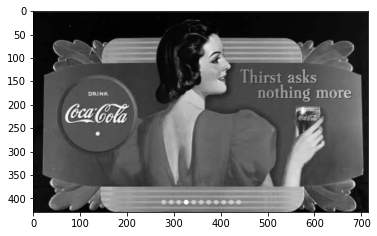

In [271]:
plt.imshow(img_6_gray, cmap='gray')

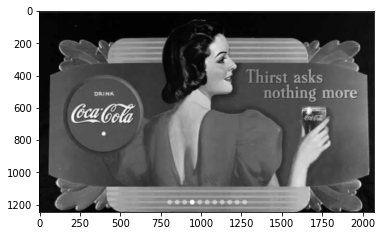

In [282]:
img_6_reshape = reshape(img_6_gray, 2.9)

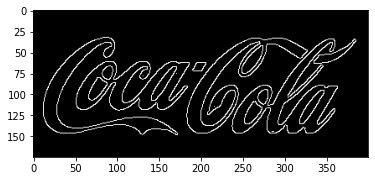

In [272]:
temp_resize = reshape(temp_edges, 1)

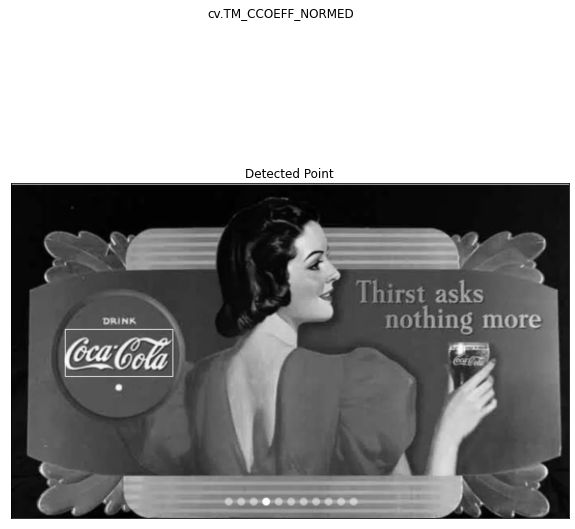

nivel de confianza: 0.17464235424995422


In [283]:
find_template(img_6_reshape, temp_resize )

imagen 7

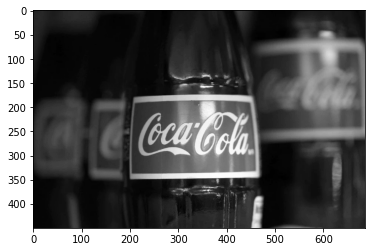

In [308]:
plt.imshow(img_7_gray, cmap='gray')

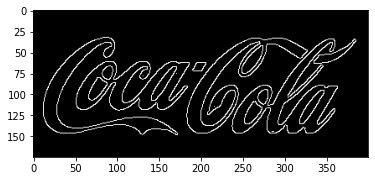

In [309]:
temp_resize = reshape(temp_edges, 1)

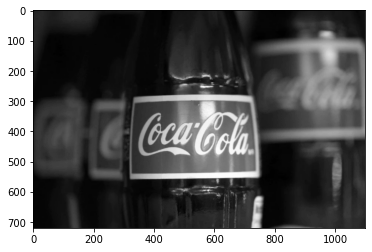

In [312]:
img_7_reshape = reshape(img_7_gray, 1.6)

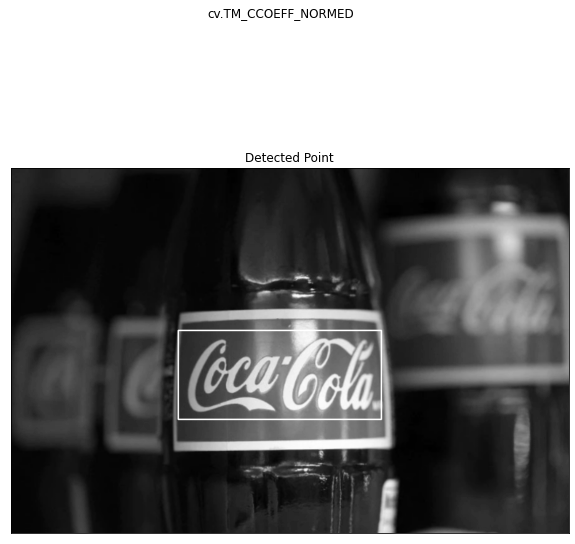

nivel de confianza: 0.12516917288303375


In [313]:
find_template(img_7_reshape, temp_resize)

#2.

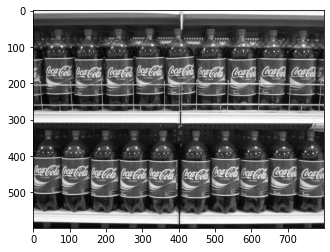

In [142]:
plt.imshow(img_4_gray, cmap='gray')

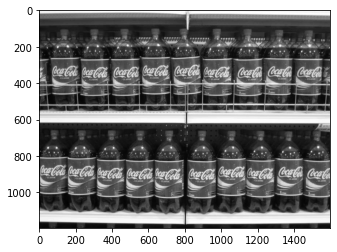

In [206]:
img_4_reshape = reshape(img_4_gray, 2)

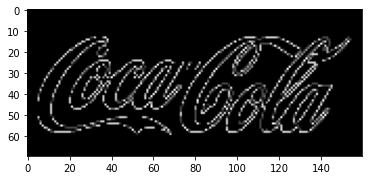

In [210]:
temp_resize = reshape(temp_edges, 0.4)

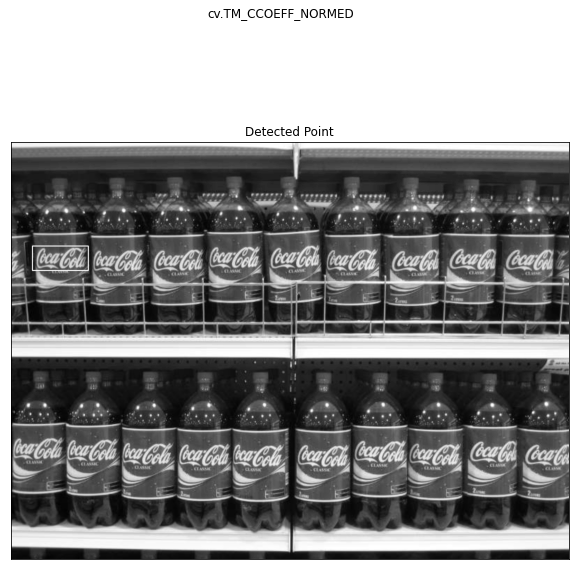

nivel de confianza: 0.22434529662132263


In [211]:
find_template(img_4_reshape, temp_resize)

agrando la imagen para que sea mas facil trabajarla

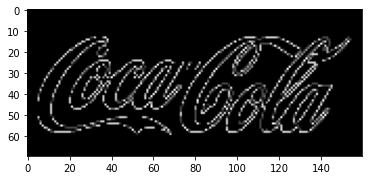

In [304]:
temp_resize = reshape(temp_edges, 0.4)

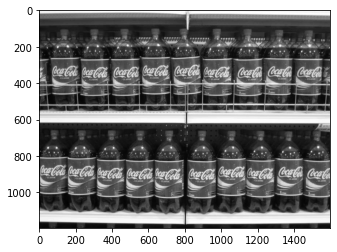

In [303]:
img_4_reshape = reshape(img_4_gray, 2)

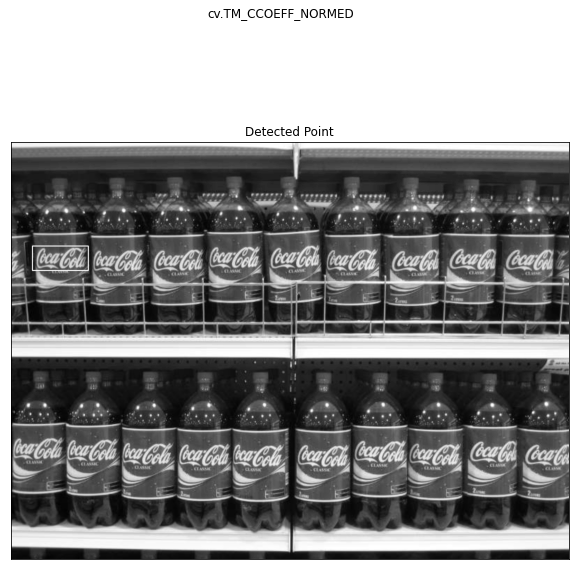

nivel de confianza: 0.22434529662132263


In [146]:
find_template(img_4_reshape, temp_resize)

#planteo un treshold y así no me quedo solo con el máximo del template matching

In [149]:
def find_template_above_threshold(img, template, threshold):
  w, h = template.shape[::-1]

  img_salida = img.copy()
  
  # Aplicamos la coincidencia de patrones
  #--------------------------------------
  res = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
  
  # Encontramos los valores mayores al threshold
  loc = np.where( res >= threshold)
  for pt in zip(*loc[::-1]):
    cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

  
  # Graficamos el procesamiento y la salida
  #----------------------------------------
  plt.figure(figsize=(10,10))
  
  # Imagen original con recuadros
  plt.imshow(img_salida,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])


  plt.suptitle('cv.TM_CCOEFF_NORMED')
  plt.show()

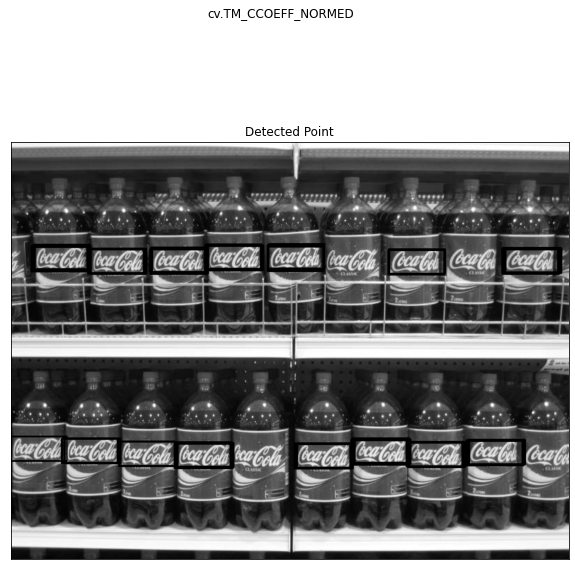

In [150]:
find_template_above_threshold(img_4_reshape, temp_resize, 0.2)

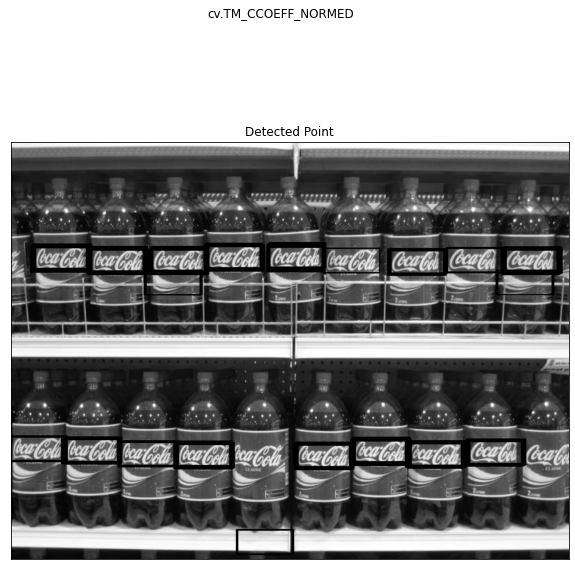

In [152]:
find_template_above_threshold(img_4_reshape, temp_resize, 0.19)

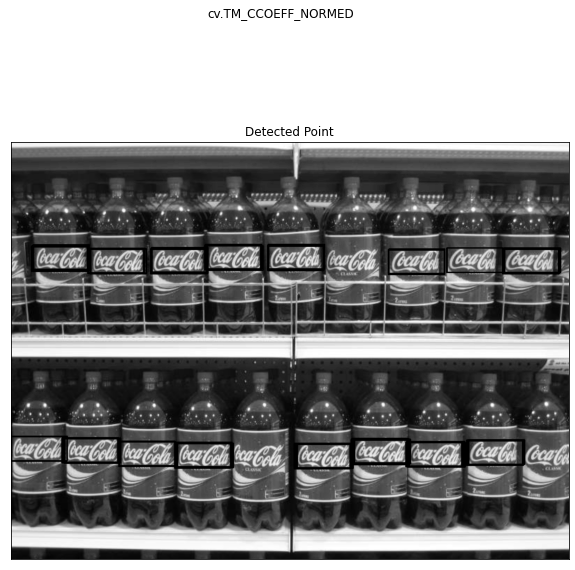

In [307]:
find_template_above_threshold(img_4_reshape, temp_resize, 0.195)

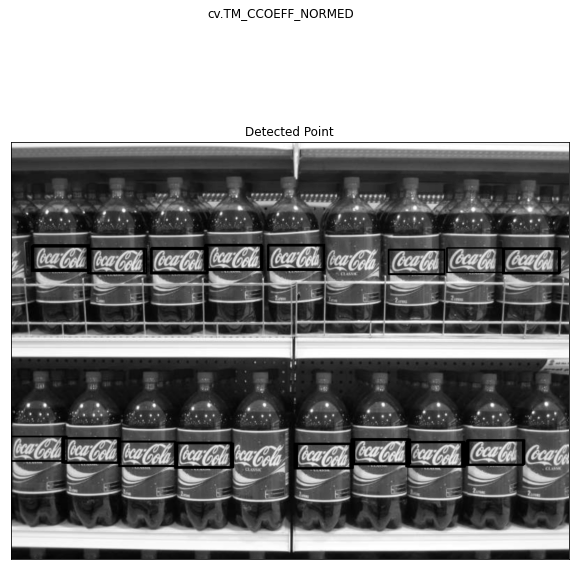

In [306]:
find_template_above_threshold(img_4_reshape, temp_resize, 0.1955)